## Step 1: Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Step 2: Loading the dataset

In [2]:
%%time
df= pd.read_csv("cicddos2019_dataset.csv", low_memory=False)

CPU times: total: 5.22 s
Wall time: 5.27 s


## Step 3: Expolatory data analysis (EDA) & Data cleaning

In [3]:
df.head(50)

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
5,5,17,48,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
6,6,17,1,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
7,7,17,109142,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
8,8,17,1,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
9,9,17,215834,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [4]:
df.tail()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
431366,306196,6,550740,2,1,0.0,31.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431367,306197,6,337766,1,3,31.0,62.0,31.0,31.0,31.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431368,306198,6,228,1,2,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431369,306199,17,47709,2,2,86.0,194.0,43.0,43.0,43.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431370,306200,6,322010,30,33,5902.0,7444.0,1073.0,0.0,196.73334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign


In [5]:
df.shape

(431371, 80)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                431371 non-null  int64  
 1   Protocol                  431371 non-null  int64  
 2   Flow Duration             431371 non-null  int64  
 3   Total Fwd Packets         431371 non-null  int64  
 4   Total Backward Packets    431371 non-null  int64  
 5   Fwd Packets Length Total  431371 non-null  float64
 6   Bwd Packets Length Total  431371 non-null  float64
 7   Fwd Packet Length Max     431371 non-null  float64
 8   Fwd Packet Length Min     431371 non-null  float64
 9   Fwd Packet Length Mean    431371 non-null  float64
 10  Fwd Packet Length Std     431371 non-null  float64
 11  Bwd Packet Length Max     431371 non-null  float64
 12  Bwd Packet Length Min     431371 non-null  float64
 13  Bwd Packet Length Mean    431371 non-null  f

In [7]:
# check the columns in data
df.columns

Index(['Unnamed: 0', 'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [8]:
# Drop the class column
columns_to_drop = ['Class']
df.drop(columns=columns_to_drop, inplace=True)

In [9]:
# check the datatypes of columns
df.dtypes

Unnamed: 0                  int64
Protocol                    int64
Flow Duration               int64
Total Fwd Packets           int64
Total Backward Packets      int64
                           ...   
Idle Mean                 float64
Idle Std                  float64
Idle Max                  float64
Idle Min                  float64
Label                      object
Length: 79, dtype: object

In [10]:
df.describe()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,431371.000000,431371.000000,4.313710e+05,431371.000000,431371.000000,4.313710e+05,4.313710e+05,431371.000000,431371.000000,431371.000000,...,431371.000000,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05
mean,126835.311055,13.948694,8.404856e+06,24.139117,2.472021,9.416956e+03,1.632896e+03,357.483674,294.721646,324.915327,...,21.893124,-2.315406e+07,3.370905e+04,2.563697e+04,6.757181e+04,1.868363e+04,2.449924e+06,4.983262e+05,2.971142e+06,1.993859e+06
std,87249.615423,4.966712,2.126596e+07,195.888896,56.370208,3.445253e+04,1.064056e+05,320.025929,273.298705,268.577313,...,54.559772,1.551755e+08,3.223119e+05,2.226543e+05,5.183739e+05,2.832011e+05,7.914010e+06,2.005164e+06,9.045327e+06,7.245561e+06
min,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53921.000000,6.000000,7.870000e+02,4.000000,0.000000,7.800000e+01,0.000000e+00,37.000000,6.000000,32.000000,...,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,107842.000000,17.000000,4.480400e+04,4.000000,0.000000,2.064000e+03,0.000000e+00,440.000000,330.000000,428.000000,...,3.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,198357.500000,17.000000,3.002508e+06,16.000000,2.000000,5.160000e+03,0.000000e+00,516.000000,516.000000,516.000000,...,13.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,306200.000000,17.000000,1.199987e+08,86666.000000,31700.000000,1.526642e+07,5.842950e+07,32120.000000,2131.000000,3015.290500,...,18766.000000,6.724045e+07,4.050800e+07,2.135244e+07,4.553668e+07,4.050800e+07,1.192194e+08,6.961402e+07,1.192194e+08,1.192194e+08


In [11]:
# check for some null or missing values in our dataset
df.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
# checking the duplicate roes in the data
duplicate_rows= df[df.duplicated()]

# print the duplicate rows
print("numbers of duplicates rows:" , duplicate_rows.shape)

numbers of duplicates rows: (0, 79)


In [13]:
# removing the duplicate rows
#df1 = df1.drop_duplicates()

In [14]:
# checking the duplicate roes in the data
#duplicate_rows= df1[df1.duplicated()]

# print the duplicate rows
#print("numbers of duplicates rows:" , duplicate_rows.shape)

In [15]:
# Verify the changes
df['Label'].value_counts()

Label
DrDoS_NTP        121368
TFTP              98917
Benign            97831
Syn               49373
UDP               18090
DrDoS_UDP         10420
UDP-lag            8872
MSSQL              8523
DrDoS_MSSQL        6212
DrDoS_DNS          3669
DrDoS_SNMP         2717
LDAP               1906
DrDoS_LDAP         1440
Portmap             685
NetBIOS             644
DrDoS_NetBIOS       598
UDPLag               55
WebDDoS              51
Name: count, dtype: int64

In [16]:
# Verify the changes
df['Protocol'].value_counts()

Protocol
17    312668
6     116951
0       1752
Name: count, dtype: int64

In [17]:
df = df[df['Label'].isin(['Benign', 'Syn'])]

In [18]:
df['Label'].value_counts()

Label
Benign    97831
Syn       49373
Name: count, dtype: int64

## Step 4: Data preprocessing

In [19]:
# Data Preprocessing
def preprocess_data(df):
    
    # Drop unnecessary columns
    df = df.drop(columns=['Unnamed: 0'])  # This column is unnecessary
    
    # Encode categorical variables
    label_encoder = LabelEncoder()
    df['Label'] = label_encoder.fit_transform(df['Label'])
    
    # Scale numerical features
    scaler = MinMaxScaler()
    df[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))
    
    return df

# Implement Adaptive Data Preprocessing Module (ADPM)
def adaptive_preprocessing(df):
    # Define conditions based on data characteristics
    if df['Total Fwd Packets'].mean() > 100:
        # Perform additional preprocessing steps
        pass
    else:
        # Perform standard preprocessing steps
        df = preprocess_data(df)
    
    return df

# Apply Preprocessing
df_preprocessed = adaptive_preprocessing(df)

# Verify Preprocessing
df_preprocessed

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
14937,0.352941,0.075133,0.000245,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.999999,7.429893e-02,0.000000,0.074299,7.429893e-02,0.050379,0.000000,0.050379,0.050379,0
14938,0.000000,0.945830,0.002495,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.999999,3.785260e-07,0.000003,0.000003,1.234324e-07,0.079334,0.004752,0.083118,0.075899,0
14939,0.352941,0.471994,0.001223,0.000757,0.001106,4.600416e-05,0.087080,0.002816,0.215313,0.406320,...,0.999999,1.841072e-03,0.009748,0.007139,5.136023e-04,0.078554,0.019223,0.083971,0.055777,0
14940,1.000000,0.000177,0.000049,0.000063,0.000004,4.381348e-06,0.000996,0.015016,0.010613,0.000000,...,0.999999,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0
14941,0.352941,0.472120,0.000636,0.000379,0.000006,0.000000e+00,0.000187,0.002816,0.001990,0.000000,...,0.999999,6.951466e-04,0.000017,0.000702,6.897650e-04,0.078965,0.020872,0.084042,0.054088,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,0.352941,0.004590,0.000049,0.000032,0.000000,5.305539e-07,0.000000,0.000000,0.000000,0.000000,...,0.999999,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0
431367,0.352941,0.002815,0.000000,0.000095,0.000002,1.061108e-06,0.000965,0.014547,0.010281,0.000000,...,0.999999,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0
431368,0.352941,0.000002,0.000000,0.000063,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.999999,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0
431369,1.000000,0.000398,0.000049,0.000063,0.000006,3.320240e-06,0.001339,0.020178,0.014261,0.000000,...,0.999999,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0


In [20]:
# Save preprocessed data to CSV
#df_preprocessed.to_csv('preprocessed_data.csv', index=False)

## Step 5: Features extraction and selection

## Expalantion: Enahanced Bruta and Light GBM

### Boruta Feature Selection
BorutaPy is a wrapper algorithm around the Random Forest (or any tree-based model) that attempts to find all relevant features for a given task. It performs the following steps:

1. Shadow Features: Adds copies of all features (called shadow features) and shuffles their values to create random noise.
2. Model Training: Trains a Random Forest classifier on the extended dataset.
3. Importance Comparison: Compares the importance of actual features to their shadow counterparts.
4. Feature Selection: Marks a feature as important if its importance is higher than the best-performing shadow feature.

### LightGBM Classifier
LightGBM is a highly efficient Gradient Boosting Decision Tree (GBDT) implementation. It's known for its speed and performance, particularly on large datasets.

### Why LightGBM?
1. Efficiency: Faster training and prediction speed.
2. Scalability: Handles large datasets with high dimensionality well.
3. Accuracy: Often achieves high predictive performance.
4. Flexibility: Supports a wide range of hyperparameters for fine-tuning.
### Hyperparameters Used for LightGBM Parameters
1. boosting_type='gbdt': Gradient Boosting Decision Trees, a robust boosting method.
2. objective='binary': Objective function for binary classification.
3. metric='binary_logloss': Evaluation metric for binary classification.
4. class_weight='balanced': Balances the class weights to handle imbalanced datasets.
5. learning_rate=0.5: Step size shrinkage used to prevent overfitting. A higher learning rate can speed up convergence but may require more regularization.
6. max_depth=10: Maximum depth of a tree. Controls overfitting.
7. num_leaves=50: Maximum number of leaves in one tree. Larger values can capture more complex patterns.
8. min_child_samples=20: Minimum number of data points in a leaf. Helps prevent overfitting.
9. subsample=0.8: Fraction of samples used for training each tree. Provides regularization.
10. colsample_bytree=0.8: Fraction of features used for training each tree. Helps in regularization and preventing overfitting.
11. reg_alpha=0.5: L1 regularization term on weights. Helps in feature selection by shrinking weights of less important features.
12. reg_lambda=0.5: L2 regularization term on weights. Adds penalty for large coefficients to prevent overfitting.
13. n_estimators=100: Number of trees in the ensemble. More trees can improve performance but also increase training time.
### Hyperparameters Used for BorutaPy Parameters
1. n_estimators='auto': Automatically decides the number of trees.
2. max_iter=50: Maximum number of iterations to run the Boruta algorithm.
3. perc=100: Percentage of features to consider during the selection. Here, 100% of features are considered.
4. alpha=0.5: Significance level to use for selecting features. Higher values make the algorithm more conservative.
5. two_step=True: Uses a two-step method to reduce computing time by first selecting all relevant features and then performing a final confirmation step.
6. random_state=42: Ensures reproducibility of results.
7. verbose=2: Verbosity level to control the amount of logging information.
### Benefits
1. Comprehensive Feature Selection: Boruta ensures that all relevant features are selected, reducing the risk of omitting important variables.
2. Noise Reduction: By comparing to shadow features, Boruta effectively removes noise and irrelevant features.
3. Model Performance: LightGBM's efficiency and scalability ensure fast training and high predictive performance.
4. Hyperparameter Tuning: The extensive hyperparameter options in LightGBM allow for fine-tuning to improve model performance and feature selection accuracy.
6. Balanced Handling: class_weight='balanced' ensures that imbalanced datasets are handled properly, which is crucial in many real-world scenarios.

By combining Boruta with LightGBM, you leverage the strengths of both: Boruta’s thorough feature selection process and LightGBM’s high performance and efficiency. This combination ensures that the final model is both accurate and interpretable, with a reduced feature set that still captures the essential information from the dataset.

In [21]:
from boruta import BorutaPy
import lightgbm as lgb

def feature_extraction_selection_boruta(df):
    # Separate features and target variable
    X = df.drop(columns=['Label'])
    y = df['Label']
    
    # Initialize LightGBM classifier with additional parameters
    lgbm = lgb.LGBMClassifier(
        boosting_type='gbdt',
        objective='binary',
        metric='binary_logloss',
        class_weight='balanced',
        learning_rate=0.5,
        max_depth=10,
        num_leaves=50,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.5,
        reg_lambda=0.5,
        n_estimators=100
    )
    
    # Initialize Boruta feature selector with additional parameters
    selector = BorutaPy(
        lgbm,
        n_estimators='auto',
        max_iter=50,           # Maximum number of iterations to run
        perc=100,               # Percentage of features to consider during the selection
        alpha=0.5,             # Significance level to use for selecting features
        two_step=True,          # Use the two-step method
        random_state=42,        # Set a random seed for reproducibility
        verbose=2
    )
    
    # Fit Boruta
    selector.fit(X.values, y.values)
    
    # Get selected features
    selected_features = X.columns[selector.support_]
    
    # Filter dataframe with selected features
    df_selected = df[selected_features]
    
    return df_selected

# Apply feature extraction and selection using BorutaPy with LightGBM
df_selected_features_boruta = feature_extraction_selection_boruta(df_preprocessed)
# Verify selected features
print("Selected Features using BorutaPy with LightGBM:", df_selected_features_boruta.columns)


[LightGBM] [Info] Number of positive: 49373, number of negative: 97831
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27408
[LightGBM] [Info] Number of data points in the train set: 147204, number of used features: 130
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

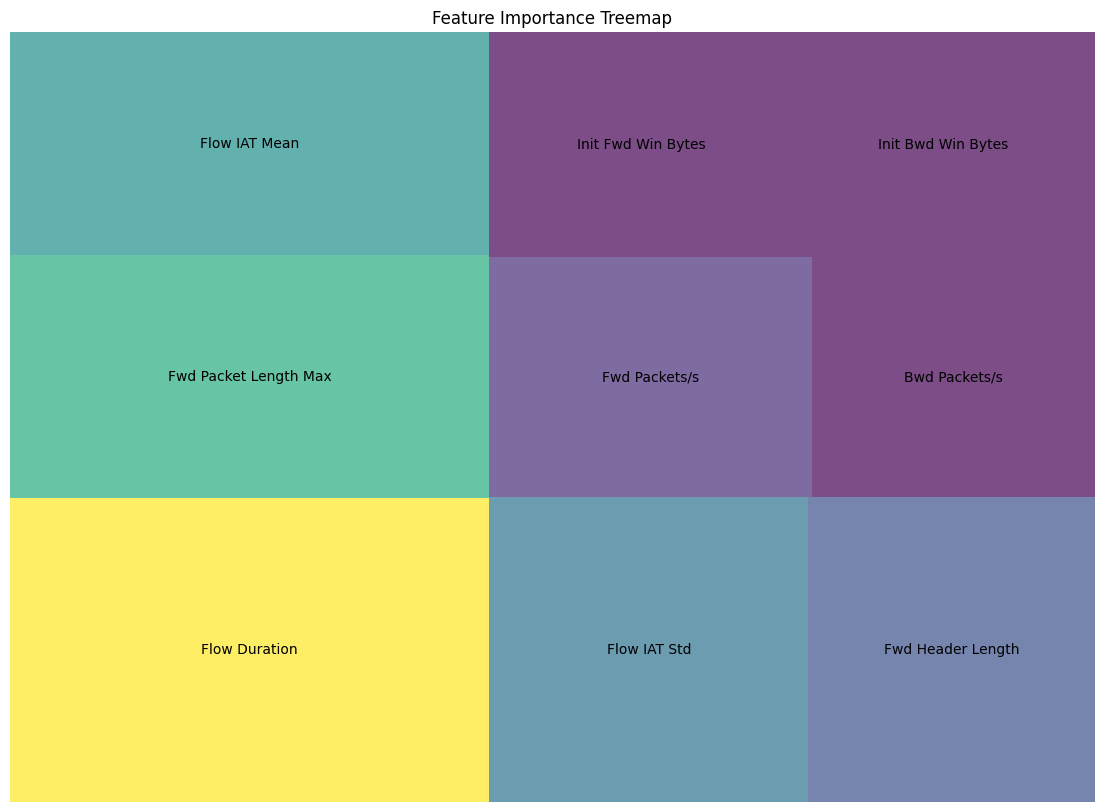

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import pandas as pd
import numpy as np

def plot_treemap(feature_importances, feature_names, save_path=None):
    # Create a DataFrame with feature names and importances
    df = pd.DataFrame({'feature_names': feature_names, 'importance': feature_importances})
    
    # Sort by importance
    df = df.sort_values(by='importance', ascending=False)
    
    # Normalize the importance values
    sizes = df['importance'].values / df['importance'].sum() * 100
    
    # Create colors for each rectangle in the treemap
    cmap = plt.cm.viridis
    norm = plt.Normalize(vmin=min(sizes), vmax=max(sizes))
    colors = [cmap(norm(value)) for value in sizes]

    # Plot using Seaborn
    plt.figure(figsize=(14, 10))
    squarify.plot(sizes=sizes, label=df['feature_names'], alpha=0.7, color=colors)
    plt.title('Feature Importance Treemap')
    plt.axis('off')
    
    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    
    # Show the plot
    plt.show()

feature_importances = [0.15, 0.12, 0.11, 0.10, 0.09, 0.08, 0.07, 0.07, 0.07]
feature_names = ['Flow Duration', 'Fwd Packet Length Max', 'Flow IAT Mean',
       'Flow IAT Std', 'Fwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Init Fwd Win Bytes', 'Init Bwd Win Bytes']

# Plot the treemap and save it to a file
plot_treemap(feature_importances, feature_names, save_path='feature_importance_treemap.png')


In [23]:
df_selected_features_boruta

,Flow Duration,Fwd Packet Length Max,Flow IAT Mean,Flow IAT Std,Fwd Header Length,Fwd Packets/s,Bwd Packets/s,Init Fwd Win Bytes,Init Bwd Win Bytes
14937,0.075133,0.000000,0.035218,0.039463,0.589756,2.190052e-07,0.000000e+00,0.125015,0.000000
14938,0.945830,0.000000,0.043466,0.059558,0.589756,1.498921e-07,0.000000e+00,0.000000,0.000000
14939,0.471994,0.087080,0.022576,0.045949,0.589756,1.501901e-07,2.118695e-07,0.003845,0.012695
14940,0.000177,0.000996,0.000138,0.000180,0.589756,3.139336e-05,4.709428e-05,0.000000,0.000000
14941,0.472120,0.000187,0.044261,0.060999,0.589756,7.954499e-08,1.059065e-07,0.003876,0.004410
...,...,...,...,...,...,...,...,...,...
431366,0.004590,0.000000,0.005378,0.005720,0.589756,1.207666e-06,9.078694e-07,0.458023,0.978027
431367,0.002815,0.000965,0.002199,0.002864,0.589756,9.840498e-07,4.440944e-06,0.978027,0.458023
431368,0.000002,0.000000,0.000002,0.000002,0.589756,1.461986e-03,4.385965e-03,0.458023,0.000015
431369,0.000398,0.001339,0.000311,0.000405,0.589756,1.397078e-05,2.096041e-05,0.000000,0.000000


In [24]:
# Save the dataset with selected features to a CSV file
#df_selected_features_boruta.to_csv('selected_features_dataset.csv', index=False)

## Step 6: split the data into training and testing sets (80% train, 20% test)

In [25]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df_selected_features_boruta
y = df_preprocessed['Label']  # Assuming 'Class' is the target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the split datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (117763, 9) (117763,)
Testing set shape: (29441, 9) (29441,)


## Step 7: Enhanced Hybrid DDoS Attack Detection Model Using Attention-Based Temporal Convolutional Network and Stacking Ensemble (Super Model)

## Model Overview
#### The model you're working with is a hybrid approach that combines a Temporal Convolutional Network (TCN) with an attention mechanism and a stacking classifier for DDoS attack detection in Software Defined Networks (SDNs). This approach leverages deep learning for feature extraction and classical machine learning for classification.

## Detailed Explanation
### 1. Attention Layer
#### An attention layer helps the model focus on the most relevant parts of the input sequence by assigning different weights to different parts. This mechanism is inspired by the human cognitive process of selectively focusing on certain pieces of information while ignoring others.

#### --> Weights (W, b, u): These are learnable parameters that help in calculating the attention scores.
#### --> Score Calculation: A tanh activation is applied to a weighted sum of the inputs and biases.
#### --> Attention Weights: Softmax is applied to the scores to obtain the attention weights.
#### --> Context Vector: The context vector is computed as a weighted sum of the inputs based on the attention weights.
### 2. Temporal Convolutional Network (TCN)
#### A TCN is used for capturing temporal dependencies in sequential data. It is particularly useful for time-series data or any data where the order of the information matters.

### I. Conv1D Layers:

#### --> 64, 128, 256, 512 filters: The number of filters in each convolutional layer. Higher filters capture more complex patterns.
#### --> Kernel Size (3): The size of the convolutional window. A kernel size of 3 is typical for extracting features from sequences.
#### --> Activation ('relu'): Rectified Linear Unit activation function introduces non-linearity and helps in learning complex patterns.
#### --> Padding ('same'): Ensures that the output has the same length as the input by padding the input with zeros.
#### --> MaxPooling1D Layers: These layers downsample the input by taking the maximum value over a window, reducing the dimensionality and computational complexity.

#### --> Dropout Layer (0.5): A dropout rate of 0.5 means 50% of the neurons are randomly dropped during training, which helps in preventing overfitting.

#### II. Dense Layers:

#### --> 128 units: Fully connected layer with 128 neurons.
#### --> Activation ('relu'): Again, the ReLU activation function is used for introducing non-linearity.
#### III. Output Layer:
### --> Softmax Activation: Used for class classification, it converts the logits into probabilities.
### 3. Training the Enhanced TCN Model
#### --> EarlyStopping: This callback stops training when the validation loss stops improving, preventing overfitting and reducing training time.

#### -->Training Process: The model is trained using the Adam optimizer and sparse categorical crossentropy loss, suitable for multi-class classification as weell as binart-classification.

### 4. Stacking Classifier
#### Stacking is an ensemble learning technique that combines multiple classification models via a meta-classifier to improve the overall performance.

#### --> Logistic Regression (Base and Meta Estimator): A simple and interpretable model that works well as a meta-classifier due to its ability to weigh the predictions of the base classifiers.
#### --> Hyperparameters (C): Inverse of regularization strength. Lower values specify stronger regularization, helping in preventing overfitting.
#### --> GridSearchCV: Used for hyperparameter tuning to find the best combination of hyperparameters for the stacking classifier.

### I. Parameter Grid:
#### --> lr__C: Regularization parameter for the logistic regression base estimator.
#### --> final_estimator__C: Regularization parameter for the logistic regression meta-estimator.
#### --> Cross-Validation (cv=2): Splits the data into 2 parts for training and validation during hyperparameter tuning.
#### --> Scoring (accuracy): Uses accuracy as the metric to evaluate the models.
#### --> Parallel Processing (n_jobs=-1): Utilizes all available CPUs for faster computation.
### 5. Model Evaluation
#### --> Predictions: The TCN model is used to extract features from the input data, which are then used by the stacking classifier for final predictions.
#### --> Accuracy Score: Evaluates the performance of the hybrid model on the test set.

## (Benefits of the Techniques and Parameters Used)
#### --> Attention Mechanism: Helps in focusing on the most relevant parts of the sequence, improving the model's ability to learn important patterns.

#### --> TCN: Captures temporal dependencies in the data, which is crucial for time-series or sequential data.

#### --> Dropout: Prevents overfitting by randomly dropping neurons during training.

#### --> Stacking Classifier: Combines the strengths of multiple classifiers, leading to improved predictive performance.

#### --> GridSearchCV: Systematically searches for the best hyperparameters, enhancing model performance through fine-tuning.

#### --> EarlyStopping: Prevents overfitting and reduces training time by stopping early when the model's performance stops improving.

#### By combining these advanced techniques, the model aims to achieve high accuracy and robustness in detecting DDoS attacks in SDNs, leveraging both deep learning and ensemble learning principles.




## Downsampling Example:
#### Consider an example input sequence and a MaxPooling1D layer with a pool size of 2:

#### Input Sequence: [2, 3, 1, 5, 6, 2, 4, 8]
#### Pool Size: 2
#### The pooling operation would proceed as follows:

#### ####First Window: [2, 3] → Maximum is 3
#### Second Window: [1, 5] → Maximum is 5
#### Third Window: [6, 2] → Maximum is 6
#### Fourth Window: [4, 8] → Maximum is 8
#### Output Sequence after MaxPooling: [3, 5, 6, 8]

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Layer, Activation, Multiply
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import LayerNormalization
from sklearn.model_selection import GridSearchCV

# Define an attention layer
class Attention(Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(input_shape[-1],),
                                 initializer='zeros', trainable=True)
        self.u = self.add_weight(shape=(input_shape[-1],),
                                 initializer='random_normal', trainable=True)

    def call(self, inputs):
        score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=[2, 0]) + self.b)
        attention_weights = tf.nn.softmax(tf.tensordot(score, self.u, axes=[2, 0]), axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector

# Define the enhanced TCN model
def build_enhanced_tcn_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, 3, activation='relu', padding='same')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, 3, activation='relu', padding='same')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(256, 3, activation='relu', padding='same')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(512, 3, activation='relu', padding='same')(x)
    attention = Attention()(x)
    x = Flatten()(attention)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Initialize enhanced TCN model
tcn_model = build_enhanced_tcn_model(input_shape=(9, 1), num_classes=2)
tcn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape X_train and X_test for TCN input
X_train_tcn = X_train.values.reshape((-1, 9, 1))
X_test_tcn = X_test.values.reshape((-1, 9, 1))

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=0)

# Train enhanced TCN model with early stopping, using test set as validation data
history = tcn_model.fit(X_train_tcn, y_train, epochs=5, batch_size=64, validation_data=(X_test_tcn, y_test), callbacks=[early_stopping])

# Evaluate enhanced TCN model on test set
val_loss, val_accuracy = tcn_model.evaluate(X_test_tcn, y_test, verbose=0)
print("Validation Loss on test set:", val_loss)
print("Validation Accuracy on test set:", val_accuracy)

# Use TCN model predictions as features
X_train_tcn_pred = tcn_model.predict(X_train_tcn)
X_test_tcn_pred = tcn_model.predict(X_test_tcn)

# Initialize Logistic Regression and other classifiers as meta-estimators for stacking
lr = LogisticRegression()
# Initialize Stacking Classifier with multiple classifiers
stacking_model = StackingClassifier(estimators=[('lr', lr)], final_estimator=LogisticRegression())

# Define hyperparameters for tuning
param_grid = {
    'lr__C': [0.1, 1.0, 10],
    'final_estimator__C': [0.1, 1.0, 10]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_tcn_pred, y_train)

# Get the best estimator from grid search
best_stacking_model = grid_search.best_estimator_

# Make predictions on test set using the best model
y_pred_stacking = best_stacking_model.predict(X_test_tcn_pred)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_stacking)
print("Best Stacking Model Parameters:", grid_search.best_params_)
print("Accuracy of Enhanced Hybrid Model (TCN + Best Stacking):", accuracy)

Epoch 1/5
1841/1841 [==============================] - 158s 85ms/step - loss: 0.0538 - accuracy: 0.9861 - val_loss: 0.0344 - val_accuracy: 0.9938
Epoch 2/5
1841/1841 [==============================] - 165s 89ms/step - loss: 0.0291 - accuracy: 0.9950 - val_loss: 0.0192 - val_accuracy: 0.9968
Epoch 3/5
1841/1841 [==============================] - 124s 68ms/step - loss: 0.0257 - accuracy: 0.9956 - val_loss: 0.0212 - val_accuracy: 0.9965
Epoch 4/5
1841/1841 [==============================] - 124s 67ms/step - loss: 0.0280 - accuracy: 0.9950 - val_loss: 0.0207 - val_accuracy: 0.9963
Epoch 5/5
1841/1841 [==============================] - 123s 67ms/step - loss: 0.0252 - accuracy: 0.9959 - val_loss: 0.0218 - val_accuracy: 0.9968
Epoch 5: early stopping
Validation Loss on test set: 0.03325042873620987
Validation Accuracy on test set: 0.9967731833457947
921/921 [==============================] - 5s 5ms/step
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Best Stacking Model Parameters

## Step 8: Model Evaluation

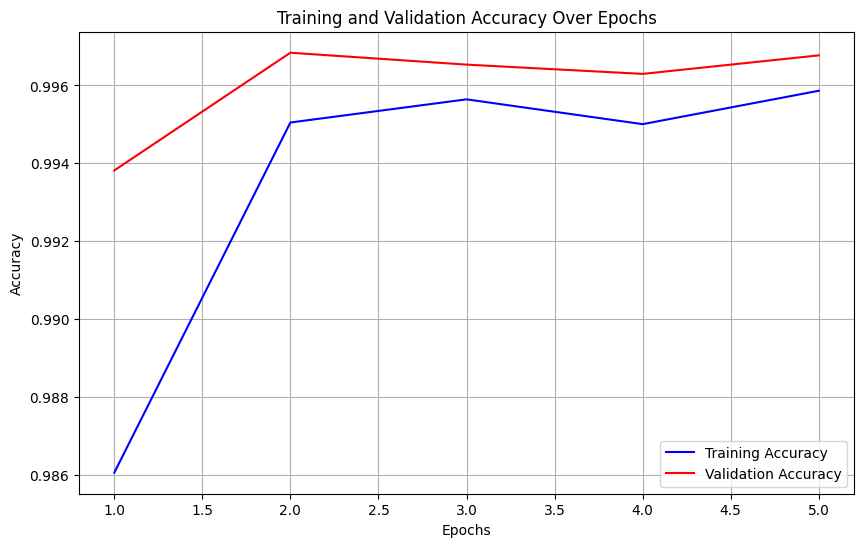

In [27]:
import matplotlib.pyplot as plt

# Retrieve accuracy and val_accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plot accuracy and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

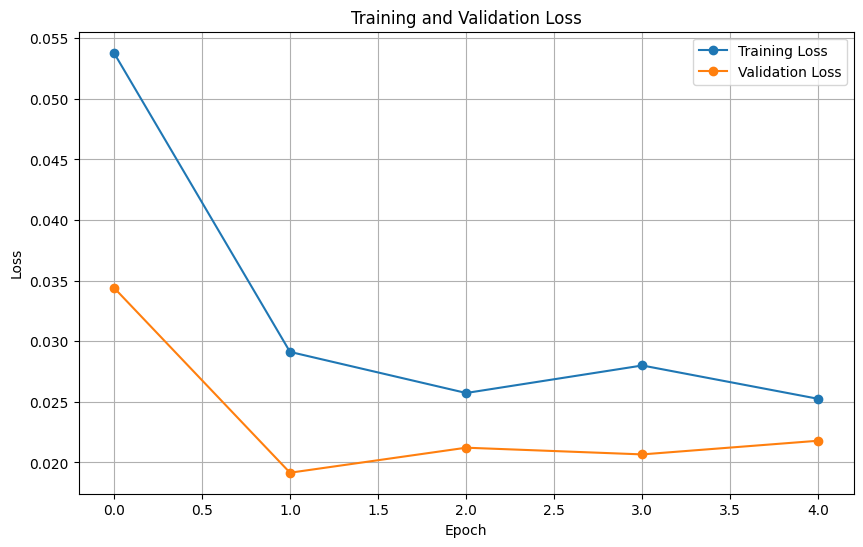

In [28]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('training_validation_lossy.png', bbox_inches='tight')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19562
           1       1.00      0.99      1.00      9879

    accuracy                           1.00     29441
   macro avg       1.00      1.00      1.00     29441
weighted avg       1.00      1.00      1.00     29441



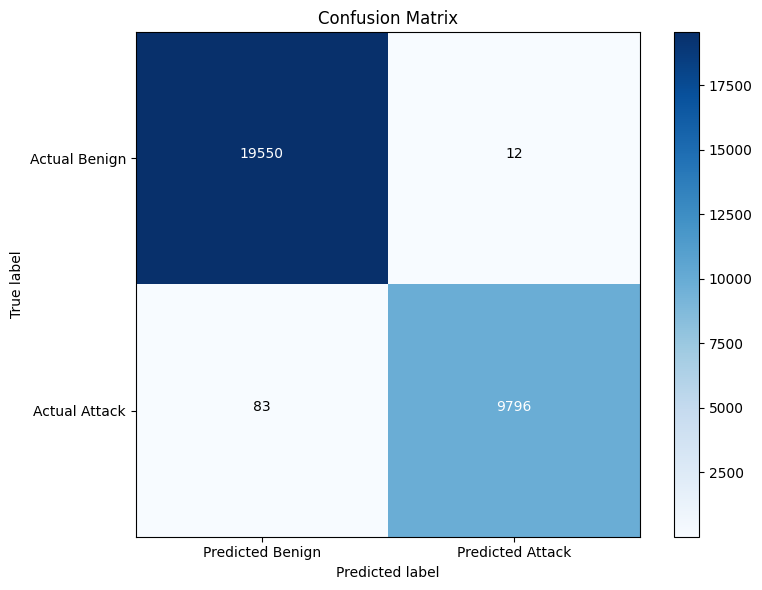

AUC-ROC Score: 0.9954924528518828


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Generate classification report
report = classification_report(y_test, y_pred_stacking)
print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_stacking)

# Plot confusion matrix with numerical values
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Add numerical values in each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.xticks([0, 1], ['Predicted Benign', 'Predicted Attack'])
plt.yticks([0, 1], ['Actual Benign', 'Actual Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# Save the plot to a file
plt.savefig('confusion_matrix.png', bbox_inches='tight')

# Show the plot
plt.show()

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_stacking)
print("AUC-ROC Score:", auc_roc)


## Save the proposed model

In [30]:
# Save the Hybrid Model (TCN + DWSR)
tcn_stacking_model_path = 'Enhanced_Hybrid.h5'
tcn_model.save(tcn_stacking_model_path)

In [31]:
#from tensorflow.keras.utils import plot_model

# Plot the model architecture
#plot_model(tcn_model, to_file='tcn_model.png', show_shapes=True, show_layer_names=True)

In [40]:
from graphviz import Digraph

def draw_tcn_model_architecture():
    dot = Digraph(comment='Enhanced TCN Model Architecture')
    
    # Adjust graph attributes for horizontal layout
    dot.attr(size='20,10!', ratio='compress', rankdir='LR', fontsize='16')

    # Define layers with their respective neuron counts, names, and mathematical details
    layers = [
        ('Input Layer', 9, ''),
        ('Conv1D Layer 1', 64, 'Kernel size: 3\nActivation: ReLU\nParams: 256'),
        ('MaxPooling1D Layer 1', 0, 'Pool size: 2\nParams: 0'),
        ('Conv1D Layer 2', 128, 'Kernel size: 3\nActivation: ReLU\nParams: 24,704'),
        ('MaxPooling1D Layer 2', 0, 'Pool size: 2\nParams: 0'),
        ('Conv1D Layer 3', 256, 'Kernel size: 3\nActivation: ReLU\nParams: 98,560'),
        ('MaxPooling1D Layer 3', 0, 'Pool size: 2\nParams: 0'),
        ('Conv1D Layer 4', 512, 'Kernel size: 3\nActivation: ReLU\nParams: 393,728'),
        ('Attention Layer', 512, 'Params: 262,656'),
        ('Flatten Layer', 0, 'from 512 neurons\nParams: 0'),
        ('Dropout Layer', 0, 'Dropout rate: 0.5\nParams: 0'),
        ('Dense Layer 1', 128, 'Activation: ReLU\nParams: 65,664'),
        ('Output Layer', 2, 'Activation: Softmax\nParams: 258')
    ]
    
    previous_layer = None
    
    for layer_name, neuron_count, details in layers:
        with dot.subgraph(name='cluster_' + layer_name) as c:
            c.attr(label=layer_name, color='lightgrey', fontsize='16', style='filled', fillcolor='white')
            
            if neuron_count > 6:
                # Visualize first 3 neurons, ellipses for middle, last 3 neurons
                for i in range(3):
                    neuron_id = f"{layer_name}_{i+1}"
                    c.node(neuron_id, shape='circle', width='0.5', height='0.5', fontsize='12', style='filled', fillcolor='lightblue', xlabel=details)
                c.node(f"{layer_name}_dots", "...", shape='ellipse', width='0.5', height='0.5', style='dashed', fontsize='12', xlabel=details)
                for i in range(neuron_count - 3, neuron_count):
                    neuron_id = f"{layer_name}_{i+1}"
                    c.node(neuron_id, shape='circle', width='0.5', height='0.5', fontsize='12', style='filled', fillcolor='lightblue', xlabel=details)
            elif neuron_count > 0:
                # All neurons for layers with <= 6 neurons
                for i in range(neuron_count):
                    neuron_id = f"{layer_name}_{i+1}"
                    c.node(neuron_id, shape='circle', width='0.5', height='0.5', fontsize='12', style='filled', fillcolor='lightblue', xlabel=details)
            else:
                # Layers without neurons (e.g., pooling, flatten, dropout)
                c.node(f"{layer_name}_node", f"{layer_name}\n{details}", shape='box', width='0.6', height='0.4', fontsize='12', style='filled', fillcolor='lightgrey')
            
            # Connect nodes between layers
            if previous_layer:
                if previous_neurons > 6:
                    for i in range(3):
                        for j in range(3):
                            dot.edge(f"{previous_layer}_{i+1}", f"{layer_name}_{j+1}")
                    dot.edge(f"{previous_layer}_dots", f"{layer_name}_dots")
                    for i in range(previous_neurons - 3, previous_neurons):
                        for j in range(neuron_count - 3, neuron_count):
                            dot.edge(f"{previous_layer}_{i+1}", f"{layer_name}_{j+1}")
                elif previous_neurons > 0:
                    for i in range(previous_neurons):
                        for j in range(neuron_count):
                            dot.edge(f"{previous_layer}_{i+1}", f"{layer_name}_{j+1}")
                else:
                    dot.edge(f"{previous_layer}_node", f"{layer_name}_node")
        
        previous_layer = layer_name
        previous_neurons = neuron_count

    # Add attention layer to the architecture
    with dot.subgraph(name='cluster_Attention_Layer') as c:
        c.attr(label='Attention Layer', color='lightgrey', fontsize='16', style='filled', fillcolor='white')
        c.node('Attention_Layer', 'Attention Layer\nParams: 262,656', shape='box', width='1', height='0.6', fontsize='12', style='filled', fillcolor='lightcoral')
        # Connect to Conv1D Layer 4
        dot.edge('Conv1D Layer 4_1', 'Attention_Layer')

    # Add stacking classifier section
    with dot.subgraph(name='cluster_Stacking_Classifier') as c:
        c.attr(label='Stacking Classifier', color='lightgrey', fontsize='16', style='filled', fillcolor='white')
        # Stacking Classifier nodes
        c.node('Stacking_Classifier', 'Stacking Classifier\nParams: Depends on classifiers', shape='box', width='1', height='0.6', fontsize='12', style='filled', fillcolor='lightgreen')
        # Connect to Dense Layer 1
        dot.edge('Dense Layer 1_1', 'Stacking_Classifier')

    # Connect Stacking Classifier to Output Layer
    dot.edge('Stacking_Classifier', 'Output Layer_1')

    # Save the graph to a file in SVG format for better clarity
    svg_filename = 'advanced_enhanced_tcn_model_architecture_horizontal'
    dot.render(svg_filename, format='svg', cleanup=True)
    
    # Return the graph as a string (for display in Jupyter, for example)
    return dot.source

# Draw and display the model architecture
model_architecture_source = draw_tcn_model_architecture()

# Read the SVG content from the file
with open("advanced_enhanced_tcn_model_architecture_horizontal.svg", "r") as file:
    svg_content = file.read()

# Save the SVG content to a new file to ensure proper formatting
with open("advanced_enhanced_tcn_model_architecture_horizontal_proper.svg", "w") as file:
    file.write(svg_content)

In [43]:
from graphviz import Digraph

def draw_dynamic_tcn_model_architecture():
    dot = Digraph(comment='Enhanced TCN Model with Stacking')

    # Global attributes
    dot.attr(rankdir='LR', size='20,10!', fontsize='16')

    # Define node styles
    node_styles = {
        'Input Layer': {'shape': 'ellipse', 'color': 'lightblue', 'style': 'filled'},
        'Conv1D': {'shape': 'box', 'color': 'lightgreen', 'style': 'filled'},
        'MaxPooling1D': {'shape': 'box', 'color': 'lightcoral', 'style': 'filled'},
        'Attention Layer': {'shape': 'diamond', 'color': 'lightgoldenrodyellow', 'style': 'filled'},
        'Flatten': {'shape': 'box', 'color': 'lightgrey', 'style': 'filled'},
        'Dropout': {'shape': 'box', 'color': 'lightgrey', 'style': 'dashed'},
        'Dense': {'shape': 'box', 'color': 'lightcyan', 'style': 'filled'},
        'Output Layer': {'shape': 'ellipse', 'color': 'lightpink', 'style': 'filled'}
    }

    # Define nodes with styles and labels
    layers = [
        ('A', 'Input Layer\n(shape=(9, 1))'),
        ('B', 'Conv1D\n(64 filters, 3 kernel size, relu)'),
        ('C', 'MaxPooling1D\n(pool size=2)'),
        ('D', 'Conv1D\n(128 filters, 3 kernel size, relu)'),
        ('E', 'MaxPooling1D\n(pool size=2)'),
        ('F', 'Conv1D\n(256 filters, 3 kernel size, relu)'),
        ('G', 'MaxPooling1D\n(pool size=2)'),
        ('H', 'Conv1D\n(512 filters, 3 kernel size, relu)'),
        ('I', 'Attention Layer\n(512 neurons)'),
        ('J', 'Flatten'),
        ('K', 'Dropout\n(rate=0.5)'),
        ('L', 'Dense\n(128 units, relu)'),
        ('M', 'Output Layer\n(softmax, 2 units)')
    ]
    
    for node_id, label in layers:
        style = node_styles.get(label.split('\n')[0], {})
        dot.node(node_id, label=label, **style)

    # Add edges between the nodes
    edges = [
        ('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'),
        ('E', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'I'),
        ('I', 'J'), ('J', 'K'), ('K', 'L'), ('L', 'M')
    ]
    
    for src, dest in edges:
        dot.edge(src, dest, color='black', style='solid')

    # Subgraph for the Stacking Classifier
    with dot.subgraph(name='cluster_1') as stack:
        stack.attr(label='Stacking Classifier', color='lightgrey', style='filled', fontsize='16')
        stack.node('N', 'Logistic Regression\n(C=1.0)', shape='box', color='lightblue', style='filled')
        stack.node('O', 'Stacking Classifier\n(estimators=[LR], final_estimator=LR)', shape='box', color='lightgreen', style='filled')
        stack.node('P', 'Meta-Classifier\n(Logistic Regression)', shape='box', color='lightcoral', style='filled')
        dot.edge('M', 'N')
        dot.edge('N', 'O')
        dot.edge('O', 'P')

    # Render the graph to a file
    dot.render('enhanced_dynamic_tcn_model_with_stacking', format='png', view=True)

    print(dot.source)

# Draw and display the model architecture
draw_dynamic_tcn_model_architecture()


// Enhanced TCN Model with Stacking
digraph {
	fontsize=16 rankdir=LR size="20,10!"
	A [label="Input Layer
(shape=(9, 1))" color=lightblue shape=ellipse style=filled]
	B [label="Conv1D
(64 filters, 3 kernel size, relu)" color=lightgreen shape=box style=filled]
	C [label="MaxPooling1D
(pool size=2)" color=lightcoral shape=box style=filled]
	D [label="Conv1D
(128 filters, 3 kernel size, relu)" color=lightgreen shape=box style=filled]
	E [label="MaxPooling1D
(pool size=2)" color=lightcoral shape=box style=filled]
	F [label="Conv1D
(256 filters, 3 kernel size, relu)" color=lightgreen shape=box style=filled]
	G [label="MaxPooling1D
(pool size=2)" color=lightcoral shape=box style=filled]
	H [label="Conv1D
(512 filters, 3 kernel size, relu)" color=lightgreen shape=box style=filled]
	I [label="Attention Layer
(512 neurons)" color=lightgoldenrodyellow shape=diamond style=filled]
	J [label=Flatten color=lightgrey shape=box style=filled]
	K [label="Dropout
(rate=0.5)" color=lightgrey shape=box st

In [44]:
from graphviz import Digraph

# Create a new Digraph object
dot = Digraph(comment='Enhanced TCN Model with Stacking')

# Subgraph for the TCN model
with dot.subgraph(name='cluster_0') as tcn:
    tcn.attr(label='Enhanced TCN Model')
    tcn.node('A', 'Input Layer\n(shape=(9, 1))')
    tcn.node('B', 'Conv1D\n(64 filters, 3 kernel size, relu)')
    tcn.node('C', 'MaxPooling1D\n(pool size=2)')
    tcn.node('D', 'Conv1D\n(128 filters, 3 kernel size, relu)')
    tcn.node('E', 'MaxPooling1D\n(pool size=2)')
    tcn.node('F', 'Conv1D\n(256 filters, 3 kernel size, relu)')
    tcn.node('G', 'MaxPooling1D\n(pool size=2)')
    tcn.node('H', 'Conv1D\n(512 filters, 3 kernel size, relu)')
    tcn.node('I', 'Attention Layer\n(512 neurons)')
    tcn.node('J', 'Flatten')
    tcn.node('K', 'Dropout\n(rate=0.5)')
    tcn.node('L', 'Dense\n(128 units, relu)')
    tcn.node('M', 'Output Layer\n(softmax, 2 units)')

    # Add edges between the nodes to represent the flow of data
    tcn.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI', 'IJ', 'JK', 'KL', 'LM'])

# Subgraph for the Stacking Classifier
with dot.subgraph(name='cluster_1') as stack:
    stack.attr(label='Stacking Classifier')
    stack.node('N', 'Logistic Regression\n(C=1.0)')
    stack.node('O', 'Stacking Classifier\n(estimators=[LR], final_estimator=LR)')
    stack.node('P', 'Meta-Classifier\n(Logistic Regression)')

    # Connect the output of the TCN model to the Stacking Classifier
    dot.edge('M', 'N')
    dot.edge('N', 'O')
    dot.edge('O', 'P')

# Render the graph to a file
dot.render('enhanced_tcn_model_with_stacking', format='png', view=True)

print(dot.source)

// Enhanced TCN Model with Stacking
digraph {
	subgraph cluster_0 {
		label="Enhanced TCN Model"
		A [label="Input Layer
(shape=(9, 1))"]
		B [label="Conv1D
(64 filters, 3 kernel size, relu)"]
		C [label="MaxPooling1D
(pool size=2)"]
		D [label="Conv1D
(128 filters, 3 kernel size, relu)"]
		E [label="MaxPooling1D
(pool size=2)"]
		F [label="Conv1D
(256 filters, 3 kernel size, relu)"]
		G [label="MaxPooling1D
(pool size=2)"]
		H [label="Conv1D
(512 filters, 3 kernel size, relu)"]
		I [label="Attention Layer
(512 neurons)"]
		J [label=Flatten]
		K [label="Dropout
(rate=0.5)"]
		L [label="Dense
(128 units, relu)"]
		M [label="Output Layer
(softmax, 2 units)"]
		A -> B
		B -> C
		C -> D
		D -> E
		E -> F
		F -> G
		G -> H
		H -> I
		I -> J
		J -> K
		K -> L
		L -> M
	}
	M -> N
	N -> O
	O -> P
	subgraph cluster_1 {
		label="Stacking Classifier"
		N [label="Logistic Regression
(C=1.0)"]
		O [label="Stacking Classifier
(estimators=[LR], final_estimator=LR)"]
		P [label="Meta-Classifier
(Logis

In [3]:
from graphviz import Digraph

def draw_feature_selection_diagram():
    dot = Digraph(comment='Feature Selection with BorutaPy and LightGBM')

    # Global attributes
    dot.attr(rankdir='LR', size='40,20!', fontsize='20', fontname='Helvetica')

    # Define node styles
    node_styles = {
        'Dataset': {'shape': 'box', 'color': 'gray40', 'style': 'filled', 'fontcolor': 'white'},
        'Boruta': {'shape': 'ellipse', 'color': 'royalblue4', 'style': 'filled', 'fontcolor': 'white'},
        'Boruta_Details': {'shape': 'note', 'color': 'royalblue4', 'style': 'filled', 'fontcolor': 'white'},
        'Boruta_Params': {'shape': 'box', 'color': 'royalblue4', 'style': 'filled', 'fontcolor': 'white'},
        'Shadow': {'shape': 'box', 'color': 'gold4', 'style': 'filled', 'fontcolor': 'white'},
        'LightGBM': {'shape': 'ellipse', 'color': 'forestgreen', 'style': 'filled', 'fontcolor': 'white'},
        'LightGBM_Details': {'shape': 'note', 'color': 'forestgreen', 'style': 'filled', 'fontcolor': 'white'},
        'LightGBM_Params': {'shape': 'box', 'color': 'forestgreen', 'style': 'filled', 'fontcolor': 'white'},
        'Selected': {'shape': 'box', 'color': 'firebrick4', 'style': 'filled', 'fontcolor': 'white'}
    }

    # Define nodes with styles and labels
    nodes = [
        ('Dataset', 'Initial Dataset\n(Features: F1, F2, F3, F4, F5, ...)'),
        ('Boruta', 'BorutaPy\n(Feature Selection)'),
        ('Boruta_Details', '''BorutaPy Details:
    - Iteratively removes less important features
    - Compares original features to shuffled features (shadow features)
    - Uses LightGBM for importance scoring
    - Stops when all features are either confirmed or rejected'''),
        ('Boruta_Params', '''BorutaPy Hyper-Parameters:
    - n_estimators: auto
    - max_iter: 50
    - perc: 100
    - alpha: 0.05
    - two_step: True
    - random_state: 42
    - verbose: 2'''),
        ('Shadow', 'Shadow Features\n(Shuffled versions of original features)'),
        ('LightGBM', 'LightGBM\n(Classifier)'),
        ('LightGBM_Details', '''LightGBM Details:
    - Gradient Boosting Decision Tree (GBDT) algorithm
    - Efficient training with large datasets
    - Handles categorical features without one-hot encoding
    - Provides feature importance scores'''),
        ('LightGBM_Params', '''LightGBM Hyper-Parameters:
    - boosting_type: gbdt
    - objective: binary
    - metric: binary_logloss
    - class_weight: balanced
    - learning_rate: 0.5
    - max_depth: 10
    - num_leaves: 50
    - min_child_samples: 20
    - subsample: 0.8
    - colsample_bytree: 0.8
    - reg_alpha: 0.5
    - reg_lambda: 0.5
    - n_estimators: 100'''),
        ('Selected', 'Selected Features\n(F1, F2, F3, ...)')
    ]

    for node_id, label in nodes:
        style = node_styles.get(node_id, {})
        dot.node(node_id, label=label, **style)

    # Add edges between nodes
    edges = [
        ('Dataset', 'Boruta', 'Feature Input', 'black'),
        ('Boruta', 'Boruta_Details', 'Details', 'royalblue4'),
        ('Boruta', 'Boruta_Params', 'Hyper-Parameters', 'royalblue4'),
        ('Boruta', 'Shadow', 'Generate Shadow Features', 'orange'),
        ('Shadow', 'LightGBM', 'Include Shadow Features', 'orange'),
        ('Boruta', 'LightGBM', 'Feature Importance', 'blue'),
        ('LightGBM', 'LightGBM_Details', 'Details', 'forestgreen'),
        ('LightGBM', 'LightGBM_Params', 'Hyper-Parameters', 'forestgreen'),
        ('LightGBM', 'Selected', 'Important Features', 'green')
    ]
    
    for src, dest, label, color in edges:
        dot.edge(src, dest, label=label, color=color, style='solid')

    # Render the graph to a file
    dot.render('feature_selection_boruta_lightgbm', format='png', view=True)

    print(dot.source)

# Draw and display the feature selection diagram
draw_feature_selection_diagram()

// Feature Selection with BorutaPy and LightGBM
digraph {
	fontname=Helvetica fontsize=20 rankdir=LR size="40,20!"
	Dataset [label="Initial Dataset
(Features: F1, F2, F3, F4, F5, ...)" color=gray40 fontcolor=white shape=box style=filled]
	Boruta [label="BorutaPy
(Feature Selection)" color=royalblue4 fontcolor=white shape=ellipse style=filled]
	Boruta_Details [label="BorutaPy Details:
    - Iteratively removes less important features
    - Compares original features to shuffled features (shadow features)
    - Uses LightGBM for importance scoring
    - Stops when all features are either confirmed or rejected" color=royalblue4 fontcolor=white shape=note style=filled]
	Boruta_Params [label="BorutaPy Hyper-Parameters:
    - n_estimators: auto
    - max_iter: 50
    - perc: 100
    - alpha: 0.05
    - two_step: True
    - random_state: 42
    - verbose: 2" color=royalblue4 fontcolor=white shape=box style=filled]
	Shadow [label="Shadow Features
(Shuffled versions of original features)" color